# Deep Reinforcement Learning for Stock Trading from Scratch: Portfolio Allocation

Tutorials to use OpenAI DRL to perform portfolio allocation in one Jupyter Notebook | Presented at NeurIPS 2020: Deep RL Workshop

* This blog is based on our paper: FinRL: A Deep Reinforcement Learning Library for Automated Stock Trading in Quantitative Finance, presented at NeurIPS 2020: Deep RL Workshop.
* Check out medium blog for detailed explanations: 
* Please report any issues to our Github: https://github.com/AI4Finance-Foundation/FinRL/issues
* **Pytorch Version** 



In [ ]:
stability_global = 0.3
gini_global = 0.3
sharpe_global = 0.3
alpha_global = 0.5

# Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Python packages](#1)
    * [2.1. Install Packages](#1.1)    
    * [2.2. Check Additional Packages](#1.2)
    * [2.3. Import Packages](#1.3)
    * [2.4. Create Folders](#1.4)
* [3. Download Data](#2)
* [4. Preprocess Data](#3)        
    * [4.1. Technical Indicators](#3.1)
    * [4.2. Perform Feature Engineering](#3.2)
* [5.Build Environment](#4)  
    * [5.1. Training & Trade Data Split](#4.1)
    * [5.2. User-defined Environment](#4.2)   
    * [5.3. Initialize Environment](#4.3)    
* [6.Implement DRL Algorithms](#5)  
* [7.Backtesting Performance](#6)  
    * [7.1. BackTestStats](#6.1)
    * [7.2. BackTestPlot](#6.2)   
    * [7.3. Baseline Stats](#6.3)   
    * [7.3. Compare to Stock Market Index](#6.4)             

<a id='0'></a>
# Part 1. Problem Definition

This problem is to design an automated trading solution for portfolio alloacation. We model the stock trading process as a Markov Decision Process (MDP). We then formulate our trading goal as a maximization problem.

The algorithm is trained using Deep Reinforcement Learning (DRL) algorithms and the components of the reinforcement learning environment are:


* Action: The action space describes the allowed actions that the agent interacts with the
environment. Normally, a ∈ A represents the weight of a stock in the porfolio: a ∈ (-1,1). Assume our stock pool includes N stocks, we can use a list [a<sub>1</sub>, a<sub>2</sub>, ... , a<sub>N</sub>] to determine the weight for each stock in the porfotlio, where a<sub>i</sub> ∈ (-1,1), a<sub>1</sub>+ a<sub>2</sub>+...+a<sub>N</sub>=1. For example, "The weight of AAPL in the portfolio is 10%." is [0.1 , ...].

* Reward function: r(s, a, s′) is the incentive mechanism for an agent to learn a better action. The change of the portfolio value when action a is taken at state s and arriving at new state s',  i.e., r(s, a, s′) = v′ − v, where v′ and v represent the portfolio
values at state s′ and s, respectively

* State: The state space describes the observations that the agent receives from the environment. Just as a human trader needs to analyze various information before executing a trade, so
our trading agent observes many different features to better learn in an interactive environment.

* Environment: Dow 30 consituents


The data of the single stock that we will be using for this case study is obtained from Yahoo Finance API. The data contains Open-High-Low-Close price and volume.


<a id='1'></a>
# Part 2. Getting Started- Load Python Packages

<a id='1.1'></a>
## 2.1. Install all the packages through FinRL library


In [ ]:
## install finrl library
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-c6ogmoxe
  Running command git clone -q https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-c6ogmoxe
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-d21o0cv4/pyfolio_42be9ef247164d02a508770449dda2ac
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-d21o0cv4/pyfolio_42be9ef247164d02a508770449dda2ac
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-d21o0cv4/elegantrl_13214cb197e448488415677e6dbcc7d9
  Running command git clone -q https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-d21o0cv4/elegantrl_13214cb197e448488415677e6dbcc7d9
  Using cached setuptools-60.9.3-py3-none-any.whl (1.1 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.5.0
    Uninstalling setuptools-59.5.0:
      Successfully uninstalled setuptools-59.5.0
ERROR: pip's

In [ ]:
!pip install setuptools==59.5.0

  Using cached setuptools-59.5.0-py3-none-any.whl (952 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 60.9.3
    Uninstalling setuptools-60.9.3:
      Successfully uninstalled setuptools-60.9.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
ccxt 1.73.44 requires setuptools>=60.9.0, but you have setuptools 59.5.0 which is incompatible.



<a id='1.2'></a>
## 2.2. Check if the additional packages needed are present, if not install them. 
* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio

<a id='1.3'></a>
## 2.3. Import Packages

In [ ]:
def mymethod():
  from finrl.finrl_meta.env_portfolio_allocation.env_portfolio import StockPortfolioEnv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
%matplotlib inline
import datetime

from finrl.apps import config
from finrl.finrl_meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.finrl_meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.drl_agents.stablebaselines3.models import DRLAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline,convert_daily_return_to_pyfolio_ts
mymethod()

import sys
sys.path.append("../FinRL-Library")

<a id='1.4'></a>
## 2.4. Create Folders

In [ ]:
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

<a id='2'></a>
# Part 3. Download Data
Yahoo Finance is a website that provides stock data, financial news, financial reports, etc. All the data provided by Yahoo Finance is free.
* FinRL uses a class **YahooDownloader** to fetch data from Yahoo Finance API
* Call Limit: Using the Public API (without authentication), you are limited to 2,000 requests per hour per IP (or up to a total of 48,000 requests a day).


In [ ]:
print(config.DOW_30_TICKER)

['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']


In [ ]:
df = YahooDownloader(start_date = '2008-01-01',
                     end_date = '2021-10-31',
                     ticker_list = config.DOW_30_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
df.head()

,date,open,high,low,close,volume,tic,day
0,2008-01-02,7.116786,7.152143,6.876786,5.958445,1079178800,AAPL,2
1,2008-01-02,46.599998,47.040001,46.259998,35.728561,7934400,AMGN,2
2,2008-01-02,52.090000,52.320000,50.790001,40.592678,8053700,AXP,2
3,2008-01-02,87.570000,87.839996,86.000000,63.481602,4303000,BA,2
4,2008-01-02,72.559998,72.669998,70.050003,47.403065,6337800,CAT,2


In [ ]:
print(df.tic.unique())

['AAPL' 'AMGN' 'AXP' 'BA' 'CAT' 'CRM' 'CSCO' 'CVX' 'DIS' 'GS' 'HD' 'HON'
 'IBM' 'INTC' 'JNJ' 'JPM' 'KO' 'MCD' 'MMM' 'MRK' 'MSFT' 'NKE' 'PG' 'TRV'
 'UNH' 'VZ' 'WBA' 'WMT' 'V' 'DOW']


In [ ]:
df.shape

(101615, 8)

# Part 4: Preprocess Data
Data preprocessing is a crucial step for training a high quality machine learning model. We need to check for missing data and do feature engineering in order to convert the data into a model-ready state.
* Add technical indicators. In practical trading, various information needs to be taken into account, for example the historical stock prices, current holding shares, technical indicators, etc. In this article, we demonstrate two trend-following technical indicators: MACD and RSI.
* Add turbulence index. Risk-aversion reflects whether an investor will choose to preserve the capital. It also influences one's trading strategy when facing different market volatility level. To control the risk in a worst-case scenario, such as financial crisis of 2007–2008, FinRL employs the financial turbulence index that measures extreme asset price fluctuation.

In [ ]:
import pandas as pd
df2 = pd.read_csv ('Symbols_Sector_SubInd_SP500_hand_completed.csv')
df2.head()
df2=df2.drop(columns=["Sub_Industry"])
boolean_series = df2.Symbols.isin(config.DOW_30_TICKER)
symbol_sector = df2[boolean_series].sort_values(by="Symbols").reset_index()
symbol_sector = symbol_sector[symbol_sector.Symbols!="V"]
symbol_sector = symbol_sector[symbol_sector.Symbols!="DOW"]


symbol_sector.head(50)

,index,Symbols,Sector
0,49,AAPL,Information Technology
1,40,AMGN,Health Care
2,32,AXP,Financials
3,73,BA,Industrials
4,91,CAT,Industrials
5,418,CRM,Information Technology
6,110,CSCO,Information Technology
7,103,CVX,Energy
8,491,DIS,Communication Services
10,220,GS,Financials


In [ ]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    use_turbulence=False,
                    user_defined_feature = False)

df = fe.preprocess_data(df)

Successfully added technical indicators


In [ ]:
df.shape

(97524, 16)

In [ ]:
df.head()

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2008-01-02,7.116786,7.152143,6.876786,5.958445,1079178800,AAPL,2,0.0,5.963711,5.955929,100.0,-66.666667,100.0,5.958445,5.958445
3483,2008-01-02,46.599998,47.040001,46.259998,35.728561,7934400,AMGN,2,0.0,5.963711,5.955929,100.0,-66.666667,100.0,35.728561,35.728561
6966,2008-01-02,52.090000,52.320000,50.790001,40.592678,8053700,AXP,2,0.0,5.963711,5.955929,100.0,-66.666667,100.0,40.592678,40.592678
10449,2008-01-02,87.570000,87.839996,86.000000,63.481602,4303000,BA,2,0.0,5.963711,5.955929,100.0,-66.666667,100.0,63.481602,63.481602
13932,2008-01-02,72.559998,72.669998,70.050003,47.403065,6337800,CAT,2,0.0,5.963711,5.955929,100.0,-66.666667,100.0,47.403065,47.403065


In [ ]:
print(df.tic.unique())

['AAPL' 'AMGN' 'AXP' 'BA' 'CAT' 'CRM' 'CSCO' 'CVX' 'DIS' 'GS' 'HD' 'HON'
 'IBM' 'INTC' 'JNJ' 'JPM' 'KO' 'MCD' 'MMM' 'MRK' 'MSFT' 'NKE' 'PG' 'TRV'
 'UNH' 'VZ' 'WBA' 'WMT']


## Add covariance matrix as states

In [ ]:
# add covariance matrix as states
df=df.sort_values(['date','tic'],ignore_index=True)
df.index = df.date.factorize()[0]

cov_list = []
return_list = []

# look back is one year
lookback=252
for i in range(lookback,len(df.index.unique())):
  data_lookback = df.loc[i-lookback:i,:]
  price_lookback=data_lookback.pivot_table(index = 'date',columns = 'tic', values = 'close')
  return_lookback = price_lookback.pct_change().dropna()
  return_list.append(return_lookback)

  covs = return_lookback.cov().values 
  cov_list.append(covs)

  
df_cov = pd.DataFrame({'date':df.date.unique()[lookback:],'cov_list':cov_list,'return_list':return_list})
df = df.merge(df_cov, on='date')
df = df.sort_values(['date','tic']).reset_index(drop=True)
        

In [ ]:
df.shape

(90468, 18)

In [ ]:
price_lookback

tic,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,HD,HON,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,VZ,WBA,WMT
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-29,114.270447,208.073990,89.795204,148.289993,150.773422,237.139999,34.470154,63.756157,121.540001,185.651245,262.680237,161.079376,96.552795,42.361988,132.046478,94.224808,46.190208,208.897064,150.828949,69.329086,202.070267,121.698204,133.474045,118.997772,298.395782,53.652531,31.589205,137.228134
2020-10-30,107.869240,207.233353,89.962814,144.389999,153.093491,232.270004,34.672974,64.404839,121.250000,184.771530,259.835449,161.421875,98.990776,42.525242,131.969498,95.068459,46.228687,207.001984,152.237488,68.707870,199.849411,118.944496,133.018036,117.297241,299.830353,53.869946,32.079258,136.080658
2020-11-02,107.780067,210.357056,92.092590,148.600006,159.156769,232.449997,34.672974,66.860573,120.129997,185.905350,263.761627,169.896652,100.098946,42.698112,133.490250,97.211464,46.767345,206.574387,155.073639,70.078186,199.711243,121.232643,134.376343,120.416496,306.669312,54.541069,33.728447,137.698898
2020-11-03,109.434860,210.213745,94.942131,153.649994,163.465439,237.130005,35.426315,66.480614,124.019997,193.460800,270.220734,175.376877,101.207123,43.072659,133.307388,100.275688,47.469524,210.694992,157.519547,70.270035,203.758133,123.411842,137.015350,122.768066,315.758331,54.588326,35.217438,140.033112
2020-11-04,113.903816,220.024246,95.050598,151.630005,151.319305,250.740005,35.320072,66.508430,125.070000,193.402176,275.432770,175.083313,99.203537,43.888977,134.173630,97.211464,47.296387,208.819321,152.427856,73.650154,213.589233,126.135841,136.452621,119.911194,348.390411,54.087345,34.209076,139.228897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-25,148.234528,204.150894,181.853577,212.869995,201.233566,293.920013,54.816982,111.379799,172.009995,412.572784,369.730896,216.603928,118.986610,48.697803,161.972534,169.921463,53.812691,236.031448,179.195389,80.892563,306.932678,163.925369,140.093582,160.654770,448.028717,51.954048,48.262218,149.458221
2021-10-26,148.912674,205.183289,180.496979,209.809998,198.675980,295.109985,55.483059,111.624374,172.039993,415.417755,367.679382,217.380585,118.511185,47.584087,163.621078,170.378723,54.050846,235.116531,178.959610,81.477013,308.904938,163.496140,142.082840,159.511353,453.161987,52.448097,47.369926,148.153488
2021-10-27,148.443954,203.118484,177.584305,206.610001,195.182938,295.149994,55.850891,109.638428,169.550003,408.832489,370.786530,214.791763,116.684067,47.199711,161.636902,166.830002,55.092766,241.391739,175.108490,80.773689,321.914246,162.058731,141.068314,158.865067,452.005768,52.003452,46.203079,146.938370


In [ ]:
config.DOW_30_TICKER

['AXP',
 'AMGN',
 'AAPL',
 'BA',
 'CAT',
 'CSCO',
 'CVX',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'KO',
 'JPM',
 'MCD',
 'MMM',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'TRV',
 'UNH',
 'CRM',
 'VZ',
 'V',
 'WBA',
 'WMT',
 'DIS',
 'DOW']

In [ ]:
df.head()

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,cov_list,return_list
0,2008-12-31,3.070357,3.133571,3.047857,2.610106,607541200,AAPL,2,-0.083441,3.125017,2.479175,42.254765,-80.485558,16.129793,2.777438,2.890685,"[[0.0013489698091085772, 0.0004284132961210987...",tic AAPL AMGN AXP ... ...
1,2008-12-31,57.110001,58.220001,57.060001,44.277355,6287200,AMGN,2,0.165891,45.195413,43.233563,51.060611,51.596191,10.432018,43.450336,42.969610,"[[0.0013489698091085772, 0.0004284132961210987...",tic AAPL AMGN AXP ... ...
2,2008-12-31,17.969999,18.750000,17.910000,14.950778,9625600,AXP,2,-0.959327,19.120093,12.981777,42.554825,-75.375188,25.776759,16.143622,18.063447,"[[0.0013489698091085772, 0.0004284132961210987...",tic AAPL AMGN AXP ... ...
3,2008-12-31,41.590000,43.049999,41.500000,32.005894,5443100,BA,2,-0.279800,32.174384,28.867833,47.440248,156.994852,5.366299,30.327214,32.389916,"[[0.0013489698091085772, 0.0004284132961210987...",tic AAPL AMGN AXP ... ...
4,2008-12-31,43.700001,45.099998,43.700001,30.775724,6277400,CAT,2,0.681454,31.544291,26.459011,51.205331,98.419997,26.331746,27.741548,27.465106,"[[0.0013489698091085772, 0.0004284132961210987...",tic AAPL AMGN AXP ... ...


<a id='4'></a>
# Part 5. Design Environment
Considering the stochastic and interactive nature of the automated stock trading tasks, a financial task is modeled as a **Markov Decision Process (MDP)** problem. The training process involves observing stock price change, taking an action and reward's calculation to have the agent adjusting its strategy accordingly. By interacting with the environment, the trading agent will derive a trading strategy with the maximized rewards as time proceeds.

Our trading environments, based on OpenAI Gym framework, simulate live stock markets with real market data according to the principle of time-driven simulation.


## Training data split: 2009-01-01 to 2020-07-01

In [ ]:
train = data_split(df, '2009-01-01','2020-07-01')
#trade = data_split(df, '2020-01-01', config.END_DATE)

In [ ]:
train.head(70)

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,cov_list,return_list
0,2009-01-02,3.067143,3.251429,3.041429,2.775246,746015200,AAPL,4,-0.070864,3.111358,2.477085,45.440203,-32.111332,2.140064,2.778294,2.891495,"[[0.0013661516854627186, 0.0004339388532261294...",tic AAPL AMGN AXP ... ...
0,2009-01-02,58.590000,59.080002,57.750000,45.228073,6547900,AMGN,4,0.245690,45.349490,43.196026,52.756858,93.114811,0.814217,43.518062,43.062892,"[[0.0013661516854627186, 0.0004339388532261294...",tic AAPL AMGN AXP ... ...
0,2009-01-02,18.570000,19.520000,18.400000,15.579444,10955700,AXP,4,-0.853165,18.931819,12.965335,43.957551,-42.769652,16.335101,16.142279,17.943626,"[[0.0013661516854627186, 0.0004339388532261294...",tic AAPL AMGN AXP ... ...
0,2009-01-02,42.799999,45.560001,42.779999,33.941101,7010200,BA,4,-0.002008,32.948629,28.452127,50.822042,272.812807,20.494464,30.469479,32.344131,"[[0.0013661516854627186, 0.0004339388532261294...",tic AAPL AMGN AXP ... ...
0,2009-01-02,44.910000,46.980000,44.709999,32.318981,7117200,CAT,4,0.866026,32.066182,26.437303,53.661259,129.710196,34.637448,27.987735,27.465710,"[[0.0013661516854627186, 0.0004339388532261294...",tic AAPL AMGN AXP ... ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2009-01-06,90.050003,92.199997,87.720001,73.196777,21551800,GS,1,2.343615,74.589542,53.534890,50.541724,172.462227,26.801258,61.574878,67.989200,"[[0.0013523462608408226, 0.0004313720261179277...",tic AAPL AMGN AXP ... ...
2,2009-01-06,24.940001,25.490000,24.620001,18.364492,22856600,HD,1,0.381124,18.286016,16.431316,55.529191,139.122009,17.200842,16.944438,15.924354,"[[0.0013523462608408226, 0.0004313720261179277...",tic AAPL AMGN AXP ... ...
2,2009-01-06,33.196327,34.702652,33.196327,25.466042,7553944,HON,1,1.113274,25.658296,19.020338,57.484835,138.374481,39.042542,21.098755,20.642098,"[[0.0013523462608408226, 0.0004313720261179277...",tic AAPL AMGN AXP ... ...
2,2009-01-06,83.279160,86.434036,82.571701,55.701302,10093377,IBM,1,0.572559,55.289731,49.117592,51.501021,183.446345,16.224054,51.326806,52.386701,"[[0.0013523462608408226, 0.0004313720261179277...",tic AAPL AMGN AXP ... ...


In [ ]:
train.shape

(81004, 18)

## Environment for Portfolio Allocation


In [ ]:
def gini_coefficient(x):
    """Compute Gini coefficient of array of values"""
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x)**2 * np.mean(x))

In [ ]:
import numpy as np
import pandas as pd
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import DummyVecEnv


class StockPortfolioEnv(gym.Env):
    """A single stock trading environment for OpenAI gym

    Attributes
    ----------
        df: DataFrame
            input data
        stock_dim : int
            number of unique stocks
        hmax : int
            maximum number of shares to trade
        initial_amount : int
            start money
        transaction_cost_pct: float
            transaction cost percentage per trade
        reward_scaling: float
            scaling factor for reward, good for training
        state_space: int
            the dimension of input features
        action_space: int
            equals stock dimension
        tech_indicator_list: list
            a list of technical indicator names
        turbulence_threshold: int
            a threshold to control risk aversion
        day: int
            an increment number to control date

    Methods
    -------
    _sell_stock()
        perform sell action based on the sign of the action
    _buy_stock()
        perform buy action based on the sign of the action
    step()
        at each step the agent will return actions, then 
        we will calculate the reward, and return the next observation.
    reset()
        reset the environment
    render()
        use render to return other functions
    save_asset_memory()
        return account value at each time step
    save_action_memory()
        return actions/positions at each time step
        

    """
    metadata = {'render.modes': ['human']}

    def __init__(self, 
                df,
                stock_dim,
                hmax,
                initial_amount,
                transaction_cost_pct,
                reward_scaling,
                state_space,
                action_space,
                tech_indicator_list,
                couples,
                turbulence_threshold=None,
                lookback=252,
                day = 0
                ):
        #super(StockEnv, self).__init__()
        #money = 10 , scope = 1
        self.day = day
        self.lookback=lookback
        self.df = df
        self.stock_dim = stock_dim
        self.hmax = hmax
        self.initial_amount = initial_amount
        self.transaction_cost_pct =transaction_cost_pct
        self.reward_scaling = reward_scaling
        self.state_space = state_space
        self.action_space = action_space
        self.tech_indicator_list = tech_indicator_list
        self.couples = couples
        self.sharpe_memory= []
        self.stability_memory = []
        self.portfolio_value_memory = []
        self.gini_memory = []
        self.sharpe_mean = 0
        self.sharpe_std = 0
        self.stability_mean = 0
        self.stability_std = 0
        self.gini_mean = 0
        self.gini_std = 0
        self.portfolio_value_mean = 0
        self.portfolio_value_std = 0

        #----
        

        # action_space normalization and shape is self.stock_dim
        self.action_space = spaces.Box(low = 0, high = 1,shape = (self.action_space,)) 
        # Shape = (34, 30)
        # covariance matrix + technical indicators
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape = (self.state_space+len(self.tech_indicator_list),self.state_space))

        # load data from a pandas dataframe
        self.data = self.df.loc[self.day,:]
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.terminal = False     
        self.turbulence_threshold = turbulence_threshold        
        # initalize state: inital portfolio return + individual stock return + individual weights
        self.portfolio_value = self.initial_amount

        # memorize portfolio value each step
        self.asset_memory = [self.initial_amount]
        # memorize portfolio return each step
        self.portfolio_return_memory = [0]
        self.actions_memory=[[1/self.stock_dim]*self.stock_dim]
        self.date_memory=[self.data.date.unique()[0]]

        
    def step(self, actions):
        # print(self.day)
        self.terminal = self.day >= len(self.df.index.unique())-1
        # print(actions)

        if self.terminal:
            df = pd.DataFrame(self.portfolio_return_memory)
            df.columns = ['daily_return']
            plt.plot(df.daily_return.cumsum(),'r')
            plt.savefig('results/cumulative_reward.png')
            plt.close()
            
            plt.plot(self.portfolio_return_memory,'r')
            plt.savefig('results/rewards.png')
            plt.close()

            print("=================================")
            print("begin_total_asset:{}".format(self.asset_memory[0]))           
            print("end_total_asset:{}".format(self.portfolio_value))

            df_daily_return = pd.DataFrame(self.portfolio_return_memory)
            df_daily_return.columns = ['daily_return']
            if df_daily_return['daily_return'].std() !=0:
              sharpe = (252**0.5)*df_daily_return['daily_return'].mean()/ \
                       df_daily_return['daily_return'].std()
              print("Sharpe: ",sharpe)
            print("=================================")
            
            return self.state, self.reward, self.terminal,{}

        else:
            #print("Model actions: ",actions)
            # actions are the portfolio weight
            # normalize to sum of 1
            #if (np.array(actions) - np.array(actions).min()).sum() != 0:
            #  norm_actions = (np.array(actions) - np.array(actions).min()) / (np.array(actions) - np.array(actions).min()).sum()
            #else:
            #  norm_actions = actions
            weights = self.softmax_normalization(actions) 
            #print("Normalized actions: ", weights)
            self.actions_memory.append(weights)
            last_day_memory = self.data

            #load next state
            self.day += 1
            self.data = self.df.loc[self.day,:]
            self.covs = self.data['cov_list'].values[0]
            self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
            #print("#########################################################")
            #print(self.state)
            # calcualte portfolio return
            # individual stocks' return * weight
            portfolio_return = sum(((self.data.close.values / last_day_memory.close.values)-1)*weights)
    
            # update portfolio value
            new_portfolio_value = self.portfolio_value*(1+portfolio_return)
            self.portfolio_value = new_portfolio_value
            self.portfolio_value_memory.append(new_portfolio_value)

            # save into memory
            self.portfolio_return_memory.append(portfolio_return)
            self.date_memory.append(self.data.date.unique()[0])            
            self.asset_memory.append(new_portfolio_value)
            

            #calculate portfolio features
            #stability
            stability_df = pd.DataFrame(self.date_memory)
            stability_df = stability_df.rename(columns={stability_df.columns[0]: 'date'})
            stability_df["date"] = pd.to_datetime(stability_df["date"])
            stability_df["daily_return"] = self.portfolio_return_memory
            from pyfolio import timeseries
            DRL_strat = convert_daily_return_to_pyfolio_ts(stability_df)
            perf_func = timeseries.perf_stats 
            perf_stats_all = perf_func( returns=DRL_strat, 
                              factor_returns=DRL_strat, 
                                positions=None, transactions=None, turnover_denom="AGB")
            stability = perf_stats_all["Stability"]
            self.stability_memory.append(stability)

            #sharpe
            arr = np.array(self.portfolio_return_memory)
            sharpe_ratio = arr.mean() / arr.std()
            self.sharpe_memory.append(sharpe_ratio)

            #gini
            self.couples["Weights"] = weights
            ginidf = self.couples.groupby(["Sector"]).sum()
            gini_index = gini_coefficient(ginidf["Weights"])
            self.gini_memory.append(gini_index)

            #normalize and check data
            sharpe_np = np.array(self.sharpe_memory)
            stability_np = np.array(self.stability_memory)
            gini_np = np.array(self.gini_memory)
            portfolio_np = np.array(self.portfolio_value_memory)

            #if self.day == 63: #da runnare per calcolare media e varianza del primo ciclo
              #print("......................................................................")
              #print(np.mean(portfolio_np))
              #print(np.std(portfolio_np))
              #print("--")
              #print(self.sharpe_memory)
              #print(np.mean(sharpe_np))
              #print(np.std(sharpe_np))
              #print(np.mean(stability_np))
              #print(np.std(stability_np))

              #1/0

            if self.day < 63: #questi valori sono stati calcolati inizialmente facendo girare il tool su 63 giorni (3 mesi)
              self.sharpe_mean = -0.2
              self.sharpe_std = 0.24
              self.stability_mean = 0.6
              self.stability_std = 0.25
              self.gini_mean = 0
              self.gini_std = 1
              self.portfolio_value_mean = 900000
              self.portfolio_value_std = 60000
            
            elif self.day % 63 == 0: #aggiorna
              self.sharpe_mean = np.mean(sharpe_np)
              self.sharpe_std = np.std(sharpe_np)
              self.stability_mean = np.mean(stability_np)
              self.stability_std = np.std(stability_np)
              self.portfolio_value_mean = np.mean(portfolio_np)
              self.portfolio_value_std = np.std(portfolio_np)
              
              self.portfolio_value_memory = []
              self.sharpe_memory = []
              self.stability_memory = []
              self.gini_memory = []
            

            normalized_sharpe = (sharpe_ratio - self.sharpe_mean)/(self.sharpe_std)
            normalized_stability = (stability - self.stability_mean)/(self.stability_std)
            normalized_gini = (gini_index - self.gini_mean)/(self.gini_std)
            normalized_pv = (new_portfolio_value - self.portfolio_value_mean)/(self.portfolio_value_std)
            reward_plus = (sharpe_global* normalized_sharpe + stability_global* normalized_stability + gini_global*normalized_gini)/(stability_global+sharpe_global+gini_global)
            alpha = alpha_global


        

            # the reward is the new portfolio value or end portfolo value
            self.reward = normalized_pv* alpha + (1-alpha)*reward_plus

        return self.state, self.reward, self.terminal, {}

    def reset(self):
        self.asset_memory = [self.initial_amount]
        self.day = 0
        self.data = self.df.loc[self.day,:]
        # load states
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.portfolio_value = self.initial_amount
        #self.cost = 0
        #self.trades = 0
        self.terminal = False 
        self.portfolio_return_memory = [0]
        self.actions_memory=[[1/self.stock_dim]*self.stock_dim]
        self.date_memory=[self.data.date.unique()[0]] 
        return self.state
    
    def render(self, mode='human'):
        return self.state
        
    def softmax_normalization(self, actions):
        numerator = np.exp(actions)
        denominator = np.sum(np.exp(actions))
        softmax_output = numerator/denominator
        return softmax_output

    
    def save_asset_memory(self):
        date_list = self.date_memory
        portfolio_return = self.portfolio_return_memory
        #print(len(date_list))
        #print(len(asset_list))
        df_account_value = pd.DataFrame({'date':date_list,'daily_return':portfolio_return})
        return df_account_value

    def save_action_memory(self):
        # date and close price length must match actions length
        date_list = self.date_memory
        df_date = pd.DataFrame(date_list)
        df_date.columns = ['date']
        
        action_list = self.actions_memory
        df_actions = pd.DataFrame(action_list)
        df_actions.columns = self.data.tic.values
        df_actions.index = df_date.date
        #df_actions = pd.DataFrame({'date':date_list,'actions':action_list})
        return df_actions

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def get_sb_env(self):
        e = DummyVecEnv([lambda: self])
        obs = e.reset()
        return e, obs

In [ ]:
stock_dimension = len(train.tic.unique())
state_space = stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")


Stock Dimension: 28, State Space: 28


In [ ]:
env_kwargs = {
    "hmax": 100, 
    "initial_amount": 1000000, 
    "transaction_cost_pct": 0.001, 
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": config.TECHNICAL_INDICATORS_LIST, 
    "action_space": stock_dimension, 
    "reward_scaling": 1e-4,
    "couples":symbol_sector
    
}

e_train_gym = StockPortfolioEnv(df = train, **env_kwargs)

In [ ]:
e_train_gym.action_space


Box(0.0, 1.0, (28,), float32)

In [ ]:

env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


<a id='5'></a>
# Part 6: Implement DRL Algorithms
* The implementation of the DRL algorithms are based on **OpenAI Baselines** and **Stable Baselines**. Stable Baselines is a fork of OpenAI Baselines, with a major structural refactoring, and code cleanups.
* FinRL library includes fine-tuned standard DRL algorithms, such as DQN, DDPG,
Multi-Agent DDPG, PPO, SAC, A2C and TD3. We also allow users to
design their own DRL algorithms by adapting these DRL algorithms.

In [ ]:
# initialize
agent = DRLAgent(env = env_train)

### Model 1: **A2C**


In [ ]:
agent = DRLAgent(env = env_train)

A2C_PARAMS = {"n_steps": 5, "ent_coef": 0.005, "learning_rate": 0.0002}
model_a2c = agent.get_model(model_name="a2c",model_kwargs = A2C_PARAMS)

{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0002}
Using cpu device


In [ ]:
trained_a2c = agent.train_model(model=model_a2c, 
                                tb_log_name='a2c',
                                total_timesteps=50000)

------------------------------------
| time/                 |          |
|    fps                | 40       |
|    iterations         | 100      |
|    time_elapsed       | 12       |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -39.7    |
|    explained_variance | -0.01    |
|    learning_rate      | 0.0002   |
|    n_updates          | 99       |
|    policy_loss        | 343      |
|    reward             | 3.146575 |
|    std                | 0.999    |
|    value_loss         | 85.9     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 39        |
|    iterations         | 200       |
|    time_elapsed       | 25        |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -39.7     |
|    explained_variance | 0.00348   |
|    learning_rate      | 0.0002    |
|    n_updates          | 19

/usr/local/lib/python3.7/dist-packages/empyrical/stats.py:799: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


-------------------------------------
| time/                 |           |
|    fps                | 37        |
|    iterations         | 1200      |
|    time_elapsed       | 159       |
|    total_timesteps    | 6000      |
| train/                |           |
|    entropy_loss       | -39.7     |
|    explained_variance | 0.02      |
|    learning_rate      | 0.0002    |
|    n_updates          | 1199      |
|    policy_loss        | 103       |
|    reward             | 1.4403108 |
|    std                | 0.998     |
|    value_loss         | 8.71      |
-------------------------------------
----------------------------------------
| time/                 |              |
|    fps                | 37           |
|    iterations         | 1300         |
|    time_elapsed       | 171          |
|    total_timesteps    | 6500         |
| train/                |              |
|    entropy_loss       | -39.7        |
|    explained_variance | -0.0228      |
|    learning_rate     

/usr/local/lib/python3.7/dist-packages/empyrical/stats.py:799: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


-------------------------------------
| time/                 |           |
|    fps                | 37        |
|    iterations         | 3500      |
|    time_elapsed       | 465       |
|    total_timesteps    | 17500     |
| train/                |           |
|    entropy_loss       | -39.6     |
|    explained_variance | -0.449    |
|    learning_rate      | 0.0002    |
|    n_updates          | 3499      |
|    policy_loss        | 149       |
|    reward             | 2.2129264 |
|    std                | 0.996     |
|    value_loss         | 18.5      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 37        |
|    iterations         | 3600      |
|    time_elapsed       | 477       |
|    total_timesteps    | 18000     |
| train/                |           |
|    entropy_loss       | -39.6     |
|    explained_variance | -9.66e-06 |
|    learning_rate      | 0.0002    |
|    n_updat

/usr/local/lib/python3.7/dist-packages/empyrical/stats.py:799: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


-------------------------------------
| time/                 |           |
|    fps                | 37        |
|    iterations         | 4100      |
|    time_elapsed       | 544       |
|    total_timesteps    | 20500     |
| train/                |           |
|    entropy_loss       | -39.6     |
|    explained_variance | 0.0159    |
|    learning_rate      | 0.0002    |
|    n_updates          | 4099      |
|    policy_loss        | 196       |
|    reward             | 2.1653862 |
|    std                | 0.994     |
|    value_loss         | 27.8      |
-------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 37         |
|    iterations         | 4200       |
|    time_elapsed       | 557        |
|    total_timesteps    | 21000      |
| train/                |            |
|    entropy_loss       | -39.6      |
|    explained_variance | -0.0116    |
|    learning_rate      | 0.0002     |
| 

/usr/local/lib/python3.7/dist-packages/empyrical/stats.py:799: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


-------------------------------------
| time/                 |           |
|    fps                | 37        |
|    iterations         | 5300      |
|    time_elapsed       | 703       |
|    total_timesteps    | 26500     |
| train/                |           |
|    entropy_loss       | -39.5     |
|    explained_variance | -0.0069   |
|    learning_rate      | 0.0002    |
|    n_updates          | 5299      |
|    policy_loss        | 162       |
|    reward             | 2.1575842 |
|    std                | 0.992     |
|    value_loss         | 22.2      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 37        |
|    iterations         | 5400      |
|    time_elapsed       | 716       |
|    total_timesteps    | 27000     |
| train/                |           |
|    entropy_loss       | -39.5     |
|    explained_variance | -0.225    |
|    learning_rate      | 0.0002    |
|    n_updat

/usr/local/lib/python3.7/dist-packages/empyrical/stats.py:799: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


------------------------------------
| time/                 |          |
|    fps                | 37       |
|    iterations         | 6400     |
|    time_elapsed       | 850      |
|    total_timesteps    | 32000    |
| train/                |          |
|    entropy_loss       | -39.5    |
|    explained_variance | -0.00318 |
|    learning_rate      | 0.0002   |
|    n_updates          | 6399     |
|    policy_loss        | 321      |
|    reward             | 4.008291 |
|    std                | 0.991    |
|    value_loss         | 77.9     |
------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 37         |
|    iterations         | 6500       |
|    time_elapsed       | 863        |
|    total_timesteps    | 32500      |
| train/                |            |
|    entropy_loss       | -39.5      |
|    explained_variance | 0.427      |
|    learning_rate      | 0.0002     |
|    n_updates    

In [ ]:
trained_a2c.save('/content/trained_models/trained_a2c.zip')

### Model 2: **PPO**


In [ ]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.005,
    "learning_rate": 0.0001,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

{'n_steps': 2048, 'ent_coef': 0.005, 'learning_rate': 0.0001, 'batch_size': 128}
Using cpu device


In [ ]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=80000)

----------------------------------
| time/              |           |
|    fps             | 40        |
|    iterations      | 1         |
|    time_elapsed    | 50        |
|    total_timesteps | 2048      |
| train/             |           |
|    reward          | 3.2283416 |
----------------------------------
begin_total_asset:1000000
end_total_asset:5966048.055016837
Sharpe:  0.940230039032165
------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 2            |
|    time_elapsed         | 103          |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0098782545 |
|    clip_fraction        | 0.0884       |
|    clip_range           | 0.2          |
|    entropy_loss         | -39.7        |
|    explained_variance   | 0.00409      |
|    learning_rate        | 0.0001       |
|    loss                 | 683        

In [ ]:
trained_ppo.save('/content/trained_models/trained_ppo.zip')

### Model 3: **DDPG**


In [ ]:
agent = DRLAgent(env = env_train)
DDPG_PARAMS = {"batch_size": 128, "buffer_size": 50000, "learning_rate": 0.001}


model_ddpg = agent.get_model("ddpg",model_kwargs = DDPG_PARAMS)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device


In [ ]:
trained_ddpg = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=50000)

begin_total_asset:1000000
end_total_asset:6021681.98700673
Sharpe:  0.9544891600296738
begin_total_asset:1000000
end_total_asset:6253266.262672934
Sharpe:  0.9385779405991255
begin_total_asset:1000000
end_total_asset:6253266.262672934
Sharpe:  0.9385779405991255
begin_total_asset:1000000
end_total_asset:6253266.262672934
Sharpe:  0.9385779405991255
-----------------------------------
| time/              |            |
|    episodes        | 4          |
|    fps             | 16         |
|    time_elapsed    | 693        |
|    total_timesteps | 11572      |
| train/             |            |
|    actor_loss      | -32.7      |
|    critic_loss     | 6.44       |
|    learning_rate   | 0.001      |
|    n_updates       | 8679       |
|    reward          | -0.8302224 |
-----------------------------------
begin_total_asset:1000000
end_total_asset:6253266.262672934
Sharpe:  0.9385779405991255
begin_total_asset:1000000
end_total_asset:6253266.262672934
Sharpe:  0.9385779405991255
begin

In [ ]:
trained_ddpg.save('/content/trained_models/trained_ddpg.zip')

### Model 4: **SAC**


In [ ]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.0003,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0003, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device


In [ ]:
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=50000)

begin_total_asset:1000000
end_total_asset:5874547.120933392
Sharpe:  0.9358234928419656
begin_total_asset:1000000
end_total_asset:6005410.178059065
Sharpe:  0.9385231983111376
begin_total_asset:1000000
end_total_asset:6154577.0147448145
Sharpe:  0.9550161925223855
begin_total_asset:1000000
end_total_asset:6277658.566958216
Sharpe:  0.9691240658400113
-----------------------------------
| time/              |            |
|    episodes        | 4          |
|    fps             | 14         |
|    time_elapsed    | 793        |
|    total_timesteps | 11572      |
| train/             |            |
|    actor_loss      | -69.1      |
|    critic_loss     | 2.66       |
|    ent_coef        | 0.00472    |
|    ent_coef_loss   | -64.9      |
|    learning_rate   | 0.0003     |
|    n_updates       | 11471      |
|    reward          | -0.7264598 |
-----------------------------------
begin_total_asset:1000000
end_total_asset:6212341.883216547
Sharpe:  0.9522976832937226
begin_total_asset:1

In [ ]:
trained_sac.save('/content/trained_models/trained_sac.zip')

### Model 5: **TD3**


In [ ]:
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 100, 
              "buffer_size": 1000000, 
              "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cpu device


In [ ]:
trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=30000)

begin_total_asset:1000000
end_total_asset:6015097.121404818
Sharpe:  0.9397175495958372
begin_total_asset:1000000
end_total_asset:5853474.816143046
Sharpe:  0.9381844128764716
begin_total_asset:1000000
end_total_asset:5853474.816143046
Sharpe:  0.9381844128764716
begin_total_asset:1000000
end_total_asset:5853474.816143046
Sharpe:  0.9381844128764716
------------------------------------
| time/              |             |
|    episodes        | 4           |
|    fps             | 17          |
|    time_elapsed    | 680         |
|    total_timesteps | 11572       |
| train/             |             |
|    actor_loss      | -15         |
|    critic_loss     | 7.8         |
|    learning_rate   | 0.001       |
|    n_updates       | 8679        |
|    reward          | -0.72141534 |
------------------------------------
begin_total_asset:1000000
end_total_asset:5853474.816143046
Sharpe:  0.9381844128764716
begin_total_asset:1000000
end_total_asset:5853474.816143046
Sharpe:  0.93818441

In [ ]:
trained_td3.save('/content/trained_models/trained_td3.zip')

# Trading a2c

Assume that we have $1,000,000 initial capital at 2019-01-01. We use the DDPG model to trade Dow jones 30 stocks.

In [ ]:
trade = data_split(df,'2020-07-01', '2021-10-31')
#a2c
e_trade_gym = StockPortfolioEnv(df = trade, **env_kwargs)

df_daily_return_a2c, df_actions_a2c = DRLAgent.DRL_prediction(model=trained_a2c,
                        environment = e_trade_gym)

df_daily_return_a2c.to_csv('df_daily_return_a2c.csv')
df_actions_a2c.to_csv('df_actions_a2c.csv')

#ddpg
e_trade_gym = StockPortfolioEnv(df = trade, **env_kwargs)

df_daily_return_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(model=trained_ddpg,
                        environment = e_trade_gym)

df_daily_return_ddpg.to_csv('df_daily_return_ddpg.csv')
df_actions_ddpg.to_csv('df_actions_ddpg.csv')

#ppo
e_trade_gym = StockPortfolioEnv(df = trade, **env_kwargs)

df_daily_return_ppo, df_actions_ppo = DRLAgent.DRL_prediction(model=trained_ppo,
                        environment = e_trade_gym)

df_daily_return_ppo.to_csv('df_daily_return_ppo.csv')
df_actions_ppo.to_csv('df_actions_ppo.csv')

#sac
e_trade_gym = StockPortfolioEnv(df = trade, **env_kwargs)

df_daily_return_sac, df_actions_sac = DRLAgent.DRL_prediction(model=trained_sac,
                        environment = e_trade_gym)

df_daily_return_sac.to_csv('df_daily_return_sac.csv')
df_actions_sac.to_csv('df_actions_sac.csv')


#td3
e_trade_gym = StockPortfolioEnv(df = trade, **env_kwargs)

df_daily_return_td3, df_actions_td3 = DRLAgent.DRL_prediction(model=trained_td3,
                        environment = e_trade_gym)

df_daily_return_td3.to_csv('df_daily_return_td3.csv')
df_actions_td3.to_csv('df_actions_td3.csv')

/usr/local/lib/python3.7/dist-packages/empyrical/stats.py:799: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


begin_total_asset:1000000
end_total_asset:1432287.2968329124
Sharpe:  1.9876332329638284
hit end!


/usr/local/lib/python3.7/dist-packages/empyrical/stats.py:799: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


begin_total_asset:1000000
end_total_asset:1488333.8442542492
Sharpe:  2.098128175789986
hit end!


/usr/local/lib/python3.7/dist-packages/empyrical/stats.py:799: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


begin_total_asset:1000000
end_total_asset:1407979.5557254567
Sharpe:  1.9446029443601225
hit end!


/usr/local/lib/python3.7/dist-packages/empyrical/stats.py:799: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


begin_total_asset:1000000
end_total_asset:1443691.8500965138
Sharpe:  2.063363550959
hit end!


/usr/local/lib/python3.7/dist-packages/empyrical/stats.py:799: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


begin_total_asset:1000000
end_total_asset:1416706.465537324
Sharpe:  1.9960180548000528
hit end!


<a id='6'></a>
## Part 7: Backtest Our Strategy a2c
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

<a id='6.1'></a>
## 7.1 BackTestStats a2c

pass in df_account_value, this information is stored in env class


In [ ]:
from pyfolio import timeseries
DRL_strat = convert_daily_return_to_pyfolio_ts(df_daily_return_ddpg)
perf_func = timeseries.perf_stats 
perf_stats_all = perf_func( returns=DRL_strat, 
                              factor_returns=DRL_strat, 
                                positions=None, transactions=None, turnover_denom="AGB")
perf_stats_all

Annual return          0.346297
Cumulative returns     0.488334
Annual volatility      0.146932
Sharpe ratio           2.098128
Calmar ratio           3.999613
Stability              0.923536
Max drawdown          -0.086583
Omega ratio            1.423315
Sortino ratio          3.244301
Skew                   0.044061
Kurtosis               2.310302
Tail ratio             1.062435
Daily value at risk   -0.017288
Alpha                  0.000000
Beta                   1.000000
dtype: float64

In [ ]:
from pyfolio import timeseries
DRL_strat = convert_daily_return_to_pyfolio_ts(df_daily_return_a2c)
perf_func = timeseries.perf_stats 
perf_stats_all = perf_func( returns=DRL_strat, 
                              factor_returns=DRL_strat, 
                                positions=None, transactions=None, turnover_denom="AGB")
perf_stats_all

Annual return          0.308204
Cumulative returns     0.432287
Annual volatility      0.140160
Sharpe ratio           1.987633
Calmar ratio           3.735610
Stability              0.921734
Max drawdown          -0.082504
Omega ratio            1.393008
Sortino ratio          3.050718
Skew                  -0.082281
Kurtosis               1.198942
Tail ratio             1.116584
Daily value at risk   -0.016553
Alpha                  0.000000
Beta                   1.000000
dtype: float64

In [ ]:
from pyfolio import timeseries
DRL_strat = convert_daily_return_to_pyfolio_ts(df_daily_return_ppo)
perf_func = timeseries.perf_stats 
perf_stats_all = perf_func( returns=DRL_strat, 
                              factor_returns=DRL_strat, 
                                positions=None, transactions=None, turnover_denom="AGB")
perf_stats_all

Annual return          0.291566
Cumulative returns     0.407980
Annual volatility      0.136410
Sharpe ratio           1.944603
Calmar ratio           3.463718
Stability              0.914079
Max drawdown          -0.084177
Omega ratio            1.381400
Sortino ratio          2.955601
Skew                  -0.188075
Kurtosis               1.036770
Tail ratio             1.052408
Daily value at risk   -0.016133
Alpha                  0.000000
Beta                   1.000000
dtype: float64

In [ ]:
from pyfolio import timeseries
DRL_strat = convert_daily_return_to_pyfolio_ts(df_daily_return_td3)
perf_func = timeseries.perf_stats 
perf_stats_all = perf_func( returns=DRL_strat, 
                              factor_returns=DRL_strat, 
                                positions=None, transactions=None, turnover_denom="AGB")
perf_stats_all

Annual return          0.297547
Cumulative returns     0.416706
Annual volatility      0.135126
Sharpe ratio           1.996018
Calmar ratio           3.754885
Stability              0.916999
Max drawdown          -0.079243
Omega ratio            1.393713
Sortino ratio          3.046875
Skew                  -0.188337
Kurtosis               1.117461
Tail ratio             1.117179
Daily value at risk   -0.015954
Alpha                  0.000000
Beta                   1.000000
dtype: float64

In [ ]:
from pyfolio import timeseries
DRL_strat = convert_daily_return_to_pyfolio_ts(df_daily_return_sac)
perf_func = timeseries.perf_stats 
perf_stats_all = perf_func( returns=DRL_strat, 
                              factor_returns=DRL_strat, 
                                positions=None, transactions=None, turnover_denom="AGB")
perf_stats_all

Annual return          0.315985
Cumulative returns     0.443692
Annual volatility      0.137730
Sharpe ratio           2.063364
Calmar ratio           4.119323
Stability              0.922919
Max drawdown          -0.076708
Omega ratio            1.410184
Sortino ratio          3.177771
Skew                  -0.093335
Kurtosis               1.245175
Tail ratio             1.158566
Daily value at risk   -0.016225
Alpha                  0.000000
Beta                   1.000000
dtype: float64

In [ ]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI", 
        start = df_daily_return_ddpg.loc[0,'date'],
        end = df_daily_return_ddpg.loc[len(df_daily_return_ddpg)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (336, 8)
Annual return          0.279047
Cumulative returns     0.388402
Annual volatility      0.139129
Sharpe ratio           1.844560
Calmar ratio           3.124551
Stability              0.918675
Max drawdown          -0.089308
Omega ratio            1.358960
Sortino ratio          2.734872
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.052781
Daily value at risk   -0.016510
dtype: float64


<a id='6.2'></a>
## 7.2 BackTestPlot

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (337, 8)


Start date,2020-07-01
End date,2021-10-29
Total months,16
,Backtest
Annual return,31.599%
Cumulative returns,44.369%
Annual volatility,13.773%
Sharpe ratio,2.06
Calmar ratio,4.12
Stability,0.92
Max drawdown,-7.671%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,7.67,2020-10-12,2020-10-28,2020-11-09,21
1,7.17,2020-09-02,2020-09-23,2020-10-12,29
2,4.66,2021-08-16,2021-09-30,2021-10-20,48
3,4.22,2021-06-04,2021-06-18,2021-07-02,21
4,3.56,2021-01-20,2021-01-29,2021-02-05,13


Stress Events,mean,min,max
New Normal,0.11%,-3.16%,3.84%


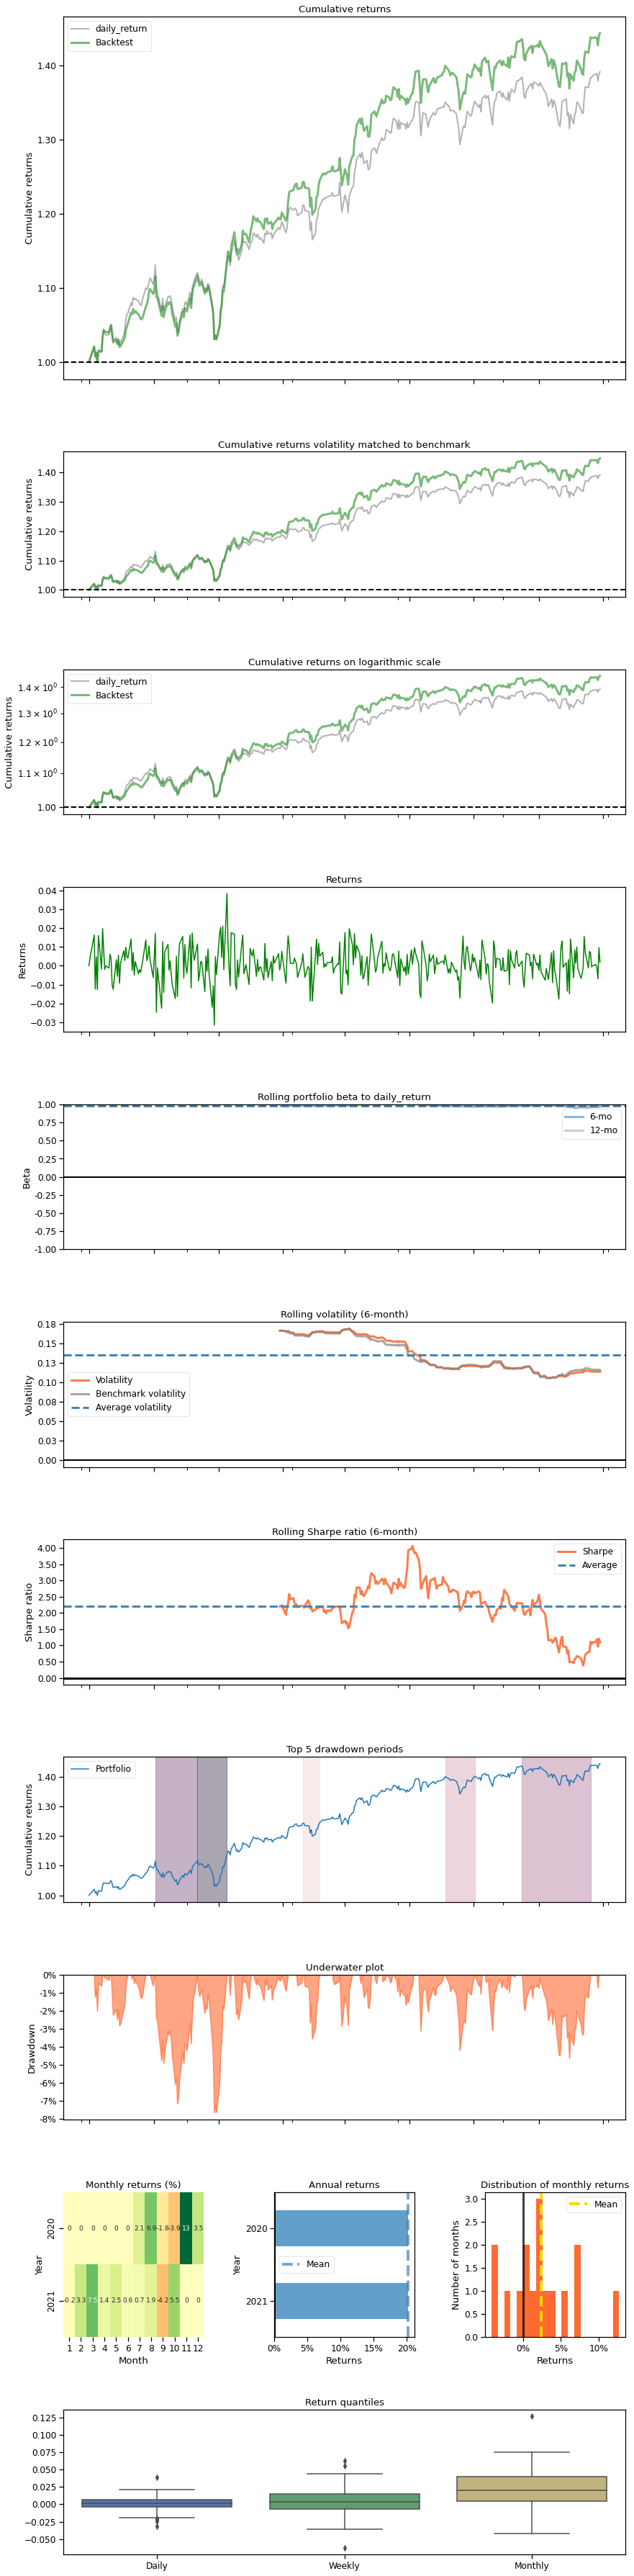

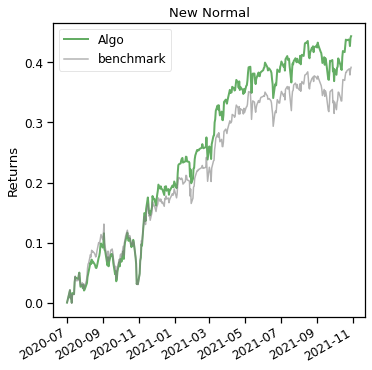

In [ ]:
import pyfolio
%matplotlib inline

baseline_df = get_baseline(
        ticker='^DJI', start=df_daily_return_ddpg.loc[0,'date'], end='2021-10-31'
    )

baseline_returns = get_daily_return(baseline_df, value_col_name="close")

with pyfolio.plotting.plotting_context(font_scale=1.1):
        pyfolio.create_full_tear_sheet(returns = DRL_strat,
                                       benchmark_rets=baseline_returns, set_context=False)

In [ ]:
a2c_cumpod =(df_daily_return_a2c.daily_return+1).cumprod()-1
ddpg_cumpod =(df_daily_return_ddpg.daily_return+1).cumprod()-1
ppo_cumpod =(df_daily_return_ppo.daily_return+1).cumprod()-1
td3_cumpod =(df_daily_return_td3.daily_return+1).cumprod()-1
sac_cumpod =(df_daily_return_sac.daily_return+1).cumprod()-1

In [ ]:
dji_cumpod =(baseline_returns+1).cumprod()-1

## Plotly: DRL, Min-Variance, DJIA

In [ ]:
from datetime import datetime as dt

import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

In [ ]:
time_ind = pd.Series(df_daily_return_a2c.date)

In [ ]:
trace1_portfolio = go.Scatter(x = time_ind, y = a2c_cumpod, mode = 'lines', name = 'A2C (Portfolio Allocation)')
trace0_portfolio = go.Scatter(x = time_ind, y = dji_cumpod, mode = 'lines', name = 'DJIA')
trace2_portfolio = go.Scatter(x = time_ind, y = ddpg_cumpod, mode = 'lines', name = 'DDPG (Portfolio Allocation)')
trace3_portfolio = go.Scatter(x = time_ind, y = ppo_cumpod, mode = 'lines', name = 'PPO (Portfolio Allocation)')
trace4_portfolio = go.Scatter(x = time_ind, y = sac_cumpod, mode = 'lines', name = 'SAC (Portfolio Allocation)')
trace5_portfolio = go.Scatter(x = time_ind, y = td3_cumpod, mode = 'lines', name = 'TD3 (Portfolio Allocation)')

#trace2_portfolio = go.Scatter(x = time_ind, y = min_var_cumpod, mode = 'lines', name = 'Min-Variance')
#trace3_portfolio = go.Scatter(x = time_ind, y = ddpg_cumpod, mode = 'lines', name = 'DDPG')
#trace4_portfolio = go.Scatter(x = time_ind, y = addpg_cumpod, mode = 'lines', name = 'Adaptive-DDPG')
#trace5_portfolio = go.Scatter(x = time_ind, y = min_cumpod, mode = 'lines', name = 'Min-Variance')

#trace4 = go.Scatter(x = time_ind, y = addpg_cumpod, mode = 'lines', name = 'Adaptive-DDPG')

#trace2 = go.Scatter(x = time_ind, y = portfolio_cost_minv, mode = 'lines', name = 'Min-Variance')
#trace3 = go.Scatter(x = time_ind, y = spx_value, mode = 'lines', name = 'SPX')

In [ ]:
fig = go.Figure()
fig.add_trace(trace0_portfolio)

fig.add_trace(trace1_portfolio)

fig.add_trace(trace2_portfolio)

fig.add_trace(trace3_portfolio)

fig.add_trace(trace4_portfolio)

fig.add_trace(trace5_portfolio)




fig.update_layout(
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=15,
            color="black"
        ),
        bgcolor="White",
        bordercolor="white",
        borderwidth=2
        
    ),
)
#fig.update_layout(legend_orientation="h")
#fig.update_layout(title={
        #'text': "Cumulative Return using FinRL",
        #'y':0.85,
        #'x':0.5,
        #'xanchor': 'center',
        #'yanchor': 'top'})
#with Transaction cost
#fig.update_layout(title =  'Quarterly Trade Date')
#fig.update_layout(
#    margin=dict(l=20, r=20, t=20, b=20),

 #   paper_bgcolor='rgba(1,1,0,0)',
  #  plot_bgcolor='rgba(1, 1, 0, 0)',
   # #xaxis_title="Date",
    #yaxis_title="Cumulative Return",
#xaxis={'type': 'date', 
 #      'tick0': time_ind[0], 
  #      'tickmode': 'linear', 
   #    'dtick': 86400000.0 *80}

#)
fig.update_xaxes(showline=True,linecolor='black',showgrid=True, gridwidth=1, gridcolor='LightSteelBlue',mirror=True)
fig.update_yaxes(showline=True,linecolor='black',showgrid=True, gridwidth=1, gridcolor='LightSteelBlue',mirror=True)
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='LightSteelBlue')

fig.show()